In [57]:
import networkx as nx
import random
def select_random_2_integer():
    i = random.randint(1, 50)
    while True:
        j = random.randint(1, 50)
        if i != j:
            break
    return i, j

def create_ffn(n):
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))
    all_edges = []
    for i in range(1, n+1):
        for j in range(1, n+1):
            if i == j:
                continue
            all_edges.append((i, j))
    G.add_edges_from(all_edges)
    return G

def create_ring(n):
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))
    all_edges = []
    for i in range(1, n+1):
        if i != n:
            all_edges.append((i, i+1))
        elif i == n:
            all_edges.append((i, 1))
    G.add_edges_from(all_edges)
    return G

def create_ring_random(n, random_edges):
    G = nx.Graph()
    G.add_nodes_from(range(1, n+1))
    all_edges = []
    for i in range(1, n+1):
        if i != n:
            all_edges.append((i, i+1))
        elif i == n:
            all_edges.append((i, 1))
    for i in range(random_edges):
        edge = select_random_2_integer()
        all_edges.append(edge)
    G.add_edges_from(all_edges)
    return G

def create_ffn_matrix(n):
    matrix = []
    for i in range (1, n+1):
        row = []
        for j in range(1, n+1):
            if i == j:
                row.append(0)
            else:
                row.append(1)
        matrix.append(row)
    return matrix

def create_ring_matrix(n):
    matrix = []
    for i in range(1, n+1):
        row = []
        for j in range(1, n+1):
            if i != n:
                if j == i+1:
                    row.append(1)
                else:
                    row.append(0)
            elif i == n:
                if j == 1:
                    row.append(1)
                else:
                    row.append(0)
        matrix.append(row)
    return matrix

In [58]:
graph1 = create_ffn(50)
graph2 = create_ring(50)
graph3 = create_ring_random(50, 10)

In [59]:
def initiate_inventory(graph):
  for node in graph.nodes():
    graph.nodes[node]['inventory'] = set()
def naming_game_step(graph, used_names):
    speaker = random.choice(list(graph.nodes()))

    neighbors = list(graph.neighbors(speaker))

    listener = random.choice(neighbors)

    speaker_inventory = graph.nodes[speaker]['inventory']
    listener_inventory = graph.nodes[listener]['inventory']

    if not speaker_inventory:
        new_name = f"name_{len(used_names) + 1}"
        used_names.add(new_name)
        speaker_inventory.add(new_name)
    else:
        new_name = random.choice(list(speaker_inventory))

    if new_name in listener_inventory:  # SUCCESS
        graph.nodes[speaker]['inventory'] = {new_name}  # Consensus: Both retain only this name
        graph.nodes[listener]['inventory'] = {new_name}
    else:  # FAILURE
        listener_inventory.add(new_name)
        if len(listener_inventory) > 10:
            listener_inventory.pop()


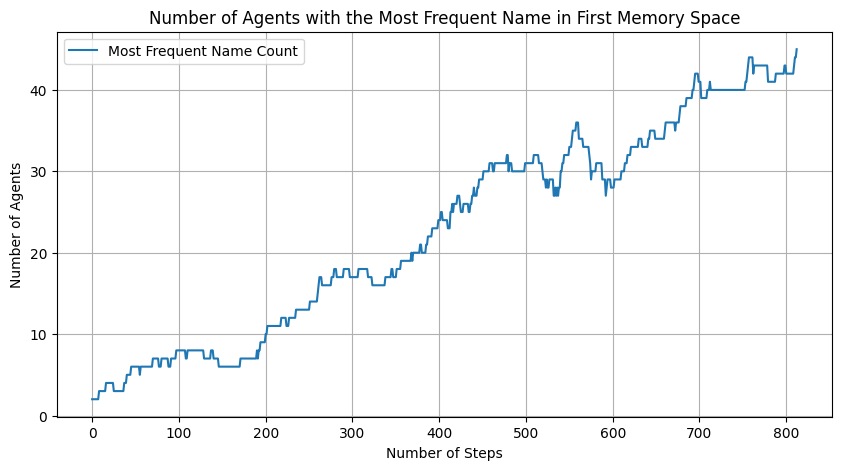

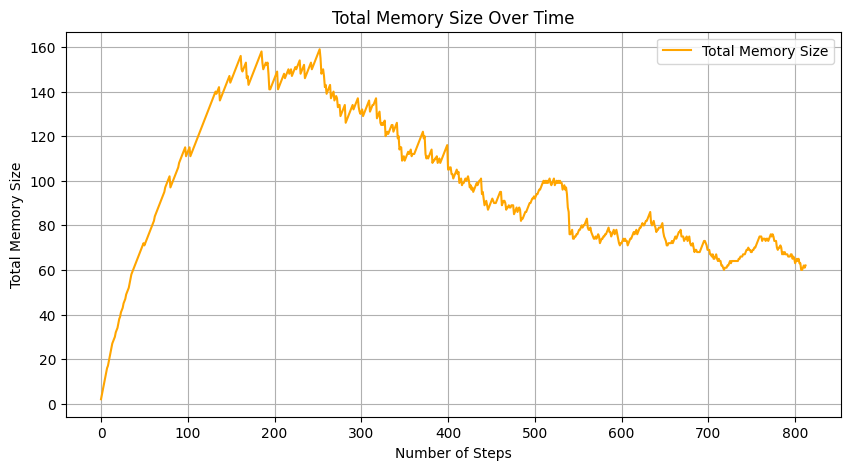

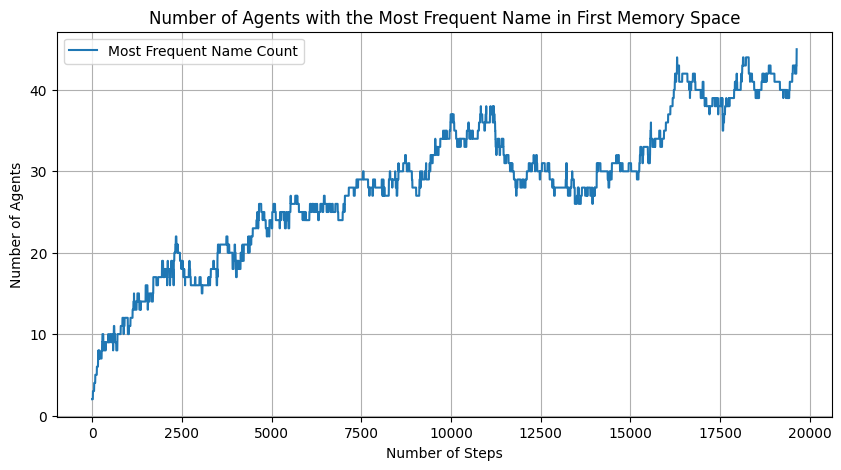

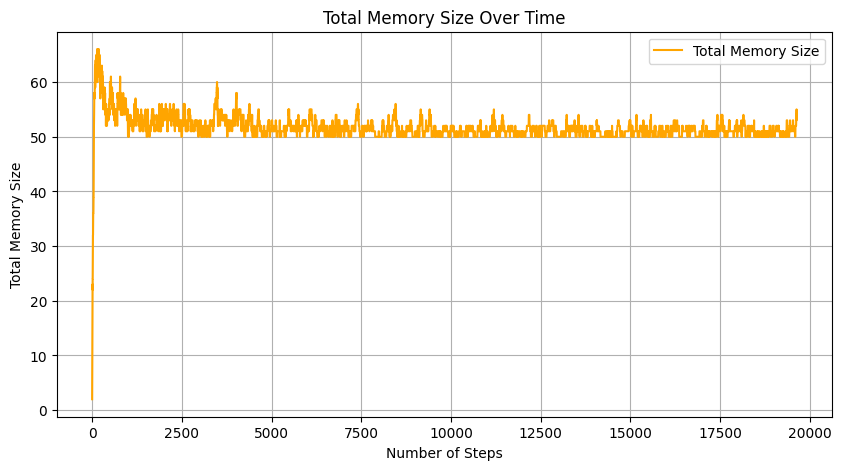

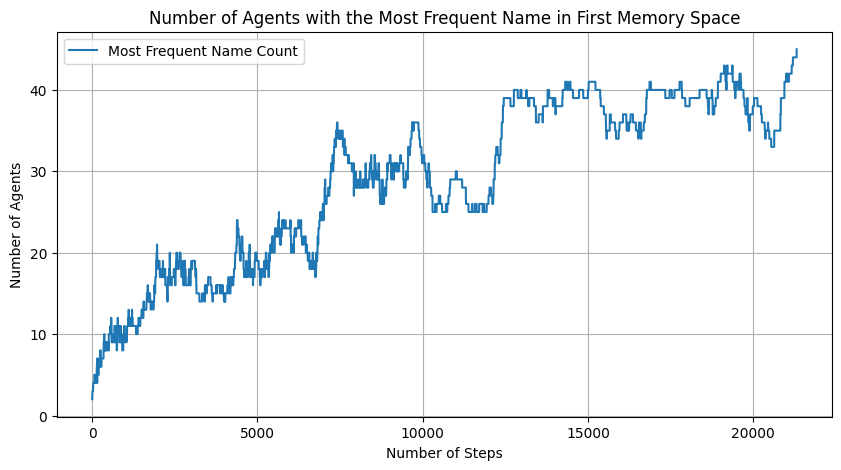

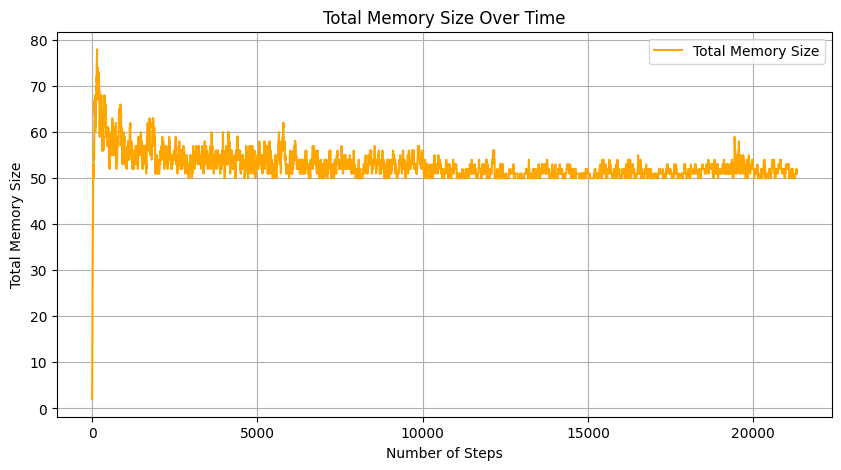

In [62]:
import matplotlib.pyplot as plt
from collections import Counter

def run_simulation(graph, max_steps=1_000_000, consensus_threshold=0.9):
    used_names = set()
    total_memory_sizes = []
    most_frequent_counts = []
    steps = 0

    while steps < max_steps:
        steps += 1
        naming_game_step(graph, used_names)

        inventories = [list(node_data['inventory'])[0] for _, node_data in graph.nodes(data=True) if node_data['inventory']]
        if not inventories:
            break
        name_counts = Counter(inventories)
        most_frequent_name, count = name_counts.most_common(1)[0]
        most_frequent_counts.append(count)

        total_memory_size = sum(len(node_data['inventory']) for _, node_data in graph.nodes(data=True))
        total_memory_sizes.append(total_memory_size)

        if count / graph.number_of_nodes() >= consensus_threshold:
            break

    return list(range(steps)), most_frequent_counts, total_memory_sizes

def plot_results(steps, most_frequent_counts, total_memory_sizes):
    # Plot 1: Most frequent name count
    plt.figure(figsize=(10, 5))
    plt.plot(steps, most_frequent_counts, label="Most Frequent Name Count")
    plt.xlabel("Number of Steps")
    plt.ylabel("Number of Agents")
    plt.title("Number of Agents with the Most Frequent Name in First Memory Space")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Total memory size
    plt.figure(figsize=(10, 5))
    plt.plot(steps, total_memory_sizes, label="Total Memory Size", color="orange")
    plt.xlabel("Number of Steps")
    plt.ylabel("Total Memory Size")
    plt.title("Total Memory Size Over Time")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    initiate_inventory(graph1)
    initiate_inventory(graph2)
    initiate_inventory(graph3)
    steps, most_frequent_counts, total_memory_sizes = run_simulation(graph1)
    plot_results(steps, most_frequent_counts, total_memory_sizes)
    steps, most_frequent_counts, total_memory_sizes = run_simulation(graph2)
    plot_results(steps, most_frequent_counts, total_memory_sizes)
    steps, most_frequent_counts, total_memory_sizes = run_simulation(graph3)
    plot_results(steps, most_frequent_counts, total_memory_sizes)